In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr

In [458]:
df = pd.read_csv("data_final.csv", parse_dates = ['Date'])
df

,Date,Exchange Rate,Prime_Rate,INDINF_CPI_Q,GDP,W.MTLS,Open,Gold_Price_in_USD,Ontario_Immigrants_International,Ontario_Emigrants_International,...,Ontario_Emigrants_International_Change_Rate,Ontario_In_migrant_Interprovincial_Change_Rate,Ontario_Out_migrant_Interprovincial_Change_Rate,UT_Graduate_Enrolment_Change_Rate,UT_Undergraduate_Enrolment_Change_Rate,Ryerson_Total_Enrolment_Change_Rate,York_Total_Enrolment_Change_Rate,Toronto_population_Change_Rate,Sales_Total_Change_Rate,Avg_Price_Month_Change_Rate
0,2001-01-01,1.502559,7.400,2.800000,33393.91068,262.1820,2641.687163,265.296667,34801.00000,3144.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001-02-01,1.521981,7.250,3.274302,33414.60595,258.2500,2474.819966,261.310800,37662.09142,2596.931225,...,-0.174004,0.138135,0.054456,0.0,0.0,0.0,0.0,0.002472,0.386364,0.022788
2,2001-03-01,1.557832,6.750,3.523191,33421.15412,250.7975,1999.363187,262.573929,39796.62476,2862.309003,...,0.102189,0.101048,0.098702,0.0,0.0,0.0,0.0,0.002166,0.263661,0.007819
3,2001-04-01,1.558629,6.625,3.600000,33411.95797,247.6000,1929.581512,260.073810,41662.00000,3997.000000,...,0.396425,0.092984,0.151916,0.0,0.0,0.0,0.0,0.002325,-0.096216,-0.008740
4,2001-05-01,1.541287,6.450,3.475476,33549.86515,254.8020,2178.740467,271.755600,42969.07156,5936.427697,...,0.485221,0.074435,0.173189,0.0,0.0,0.0,0.0,0.002177,0.145933,0.009777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2020-08-01,1.323456,2.450,0.380368,43904.52149,641.6550,11188.406810,1966.617619,17844.25527,2164.615160,...,0.305558,-0.110557,-0.119386,0.0,0.0,0.0,0.0,0.000000,-0.090586,-0.014386
236,2020-09-01,1.321741,2.450,0.548652,44363.54588,642.2860,11119.767620,1922.101364,17850.99984,2346.044135,...,0.083816,-0.116113,-0.103767,0.0,0.0,0.0,0.0,0.000000,0.008464,0.019337
237,2020-10-01,1.321338,2.450,0.700000,44628.00813,644.0925,11455.091750,1897.330909,17281.00000,2212.000000,...,-0.057136,-0.118310,-0.078258,0.0,0.0,0.0,0.0,0.000000,-0.071659,-0.026277
238,2020-11-01,1.307030,2.450,0.700000,45052.95819,652.8825,11786.198540,1866.655238,17281.00000,2212.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,-0.043811,-0.041836


In [459]:
df = df.set_index(["Date"])
df = df.dropna()

# PCA feature reduction

In [460]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [461]:
df_feature = df.drop(["Avg_Price_Month"], axis = 1)
df_label = df["Avg_Price_Month"]

In [462]:
df_feature_scaled = StandardScaler().fit_transform(df_feature)

In [463]:
column_names = df_feature.columns.to_list()
column_names

['Exchange Rate',
 'Prime_Rate',
 'INDINF_CPI_Q',
 'GDP',
 'W.MTLS',
 'Open',
 'Gold_Price_in_USD',
 'Ontario_Immigrants_International',
 'Ontario_Emigrants_International',
 'Ontario_In_migrant_Interprovincial',
 'Ontario_Out_migrant_Interprovincial',
 'Crime_severity_index_toronto',
 'Toronto_median_age',
 'UT_Total_Enrolment',
 'Participation_rate_toronto',
 'Employment_rate_toronto',
 'Toronto_population',
 'Sales_Total',
 'New Units Number (Plan for construction)',
 'New Units Number (construction complete)',
 'Exchange Rate_Change_Rate',
 'Prime_Rate_Change_Rate',
 'GDP_Change_Rate',
 'W.MTLS_Change_Rate',
 'Gold_Price_in_USD_Change_Rate',
 'Ontario_population_Change_Rate',
 'Ontario_Immigrants_International_Change_Rate',
 'Ontario_Emigrants_International_Change_Rate',
 'Ontario_In_migrant_Interprovincial_Change_Rate',
 'Ontario_Out_migrant_Interprovincial_Change_Rate',
 'UT_Graduate_Enrolment_Change_Rate',
 'UT_Undergraduate_Enrolment_Change_Rate',
 'Ryerson_Total_Enrolment_Chang

In [464]:
df_scaled_feature = pd.DataFrame(data = df_feature_scaled, columns = column_names, index = df_feature.index)
df_scaled_feature

,Exchange Rate,Prime_Rate,INDINF_CPI_Q,GDP,W.MTLS,Open,Gold_Price_in_USD,Ontario_Immigrants_International,Ontario_Emigrants_International,Ontario_In_migrant_Interprovincial,...,Ontario_Emigrants_International_Change_Rate,Ontario_In_migrant_Interprovincial_Change_Rate,Ontario_Out_migrant_Interprovincial_Change_Rate,UT_Graduate_Enrolment_Change_Rate,UT_Undergraduate_Enrolment_Change_Rate,Ryerson_Total_Enrolment_Change_Rate,York_Total_Enrolment_Change_Rate,Toronto_population_Change_Rate,Sales_Total_Change_Rate,Avg_Price_Month_Change_Rate
Date,,,,,,,,,,,,,,,,,,,,,
2001-02-01,1.726013,2.956890,1.708737,-1.648246,-1.754254,-0.544646,-1.590121,1.337007,-2.007478,0.199711,...,-0.163938,0.966684,0.359447,-0.261383,-0.216775,-0.207055,-0.1433,3.164183,1.760670,0.519042
2001-03-01,1.932544,2.532395,2.000837,-1.646440,-1.804265,-0.741190,-1.587437,1.671544,-1.872901,0.594130,...,0.197081,0.690439,0.706727,-0.261383,-0.216775,-0.207055,-0.1433,2.382003,1.162909,0.065993
2001-04-01,1.937136,2.426271,2.090982,-1.648977,-1.825722,-0.770036,-1.592748,1.963897,-1.297485,0.993747,...,0.581684,0.630372,1.124398,-0.261383,-0.216775,-0.207055,-0.1433,2.788222,-0.590282,-0.435177
2001-05-01,1.837234,2.277698,1.944839,-1.610930,-1.777392,-0.667039,-1.567933,2.168749,-0.313976,1.343391,...,0.697752,0.492208,1.291373,-0.261383,-0.216775,-0.207055,-0.1433,2.410220,0.589381,0.125248
2001-06-01,1.746641,2.107900,1.563686,-1.624505,-1.823625,-0.695180,-1.571159,2.264040,0.978413,1.602870,...,0.624659,0.320725,1.246134,-0.261383,-0.216775,-0.207055,-0.1433,2.404658,0.214072,0.183396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,0.582349,-1.118259,-1.687634,1.245765,0.818634,3.057364,2.032511,-1.768962,-2.226711,-0.220636,...,0.462910,-0.885731,-1.005018,-0.261383,-0.216775,-0.207055,-0.1433,-3.151199,-0.562854,-0.606053
2020-09-01,0.572467,-1.118259,-1.490134,1.372403,0.822868,3.028990,1.937943,-1.767905,-2.134706,-0.625050,...,0.173065,-0.927112,-0.882425,-0.261383,-0.216775,-0.207055,-0.1433,-3.151199,-0.080320,0.414611
2020-10-01,0.570148,-1.118259,-1.312509,1.445364,0.834991,3.167605,1.885323,-1.857239,-2.202682,-0.989270,...,-0.011177,-0.943477,-0.682208,-0.261383,-0.216775,-0.207055,-0.1433,-3.151199,-0.470648,-0.965931


In [465]:
df_label

Date
2001-02-01    189990.7036
2001-03-01    191476.2205
2001-04-01    189802.6914
2001-05-01    191658.3372
2001-06-01    193900.3486
                 ...     
2020-08-01    673173.9453
2020-09-01    686191.4216
2020-10-01    668160.6273
2020-11-01    640207.7862
2020-12-01    625828.1154
Name: Avg_Price_Month, Length: 239, dtype: float64

In [466]:
pca = PCA(n_components = 14)

In [467]:
pca_result = pca.fit_transform(df_scaled_feature)

In [468]:
pca.explained_variance_ratio_

array([0.2726347 , 0.10540351, 0.0881203 , 0.06539892, 0.06317332,
       0.05614625, 0.04456303, 0.03757595, 0.03048999, 0.02781958,
       0.02668211, 0.02200037, 0.01955578, 0.01753034])

In [469]:
pca_result

array([[-6.43329545,  0.06712657, -1.40155694, ...,  1.3443739 ,
        -0.45643376, -1.20677597],
       [-6.36632767, -0.11878742, -1.26062803, ...,  1.07008289,
        -0.05073278, -0.99142049],
       [-6.47098424, -0.8121401 , -1.64503819, ...,  0.82146356,
        -0.21209661, -1.23426713],
       ...,
       [ 5.33687097,  1.33236668,  2.56975072, ..., -1.66902986,
         0.48775863,  2.1095031 ],
       [ 5.22519183,  1.69726426,  1.80964352, ..., -1.14334522,
         0.13645541,  2.12033399],
       [ 5.52808951,  1.53610565,  1.42598266, ..., -1.00516539,
        -0.32656447,  2.04264278]])

In [470]:
pca_df = pd.DataFrame(
    data = pca_result,
    index = df_label.index,
    columns = ["PC_1", "PC_2", "PC_3", "PC_4", "PC_5", "PC_6", "PC_7", "PC_8", "PC_9", "PC_10", "PC_11", "PC_12", "PC_13", "PC_14"]
)

In [471]:
pca_df["Avg_Price_Month"] = df_label

In [472]:
data_1 = pca_df

In [473]:
data_1

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,Avg_Price_Month
Date,,,,,,,,,,,,,,,
2001-02-01,-6.433295,0.067127,-1.401557,2.008054,2.150592,-1.014829,-1.662612,-1.255828,-0.110760,0.924858,1.547080,1.344374,-0.456434,-1.206776,189990.7036
2001-03-01,-6.366328,-0.118787,-1.260628,1.295019,2.965479,-1.370290,-1.045478,-1.008212,-0.085547,0.707221,1.692785,1.070083,-0.050733,-0.991420,191476.2205
2001-04-01,-6.470984,-0.812140,-1.645038,0.460930,2.799201,0.051018,-0.437139,-1.453516,-0.184888,0.894984,-0.065382,0.821464,-0.212097,-1.234267,189802.6914
2001-05-01,-6.549394,-1.274293,-2.570890,1.159556,1.490392,0.420947,0.817615,-1.079211,-0.335952,0.634410,0.777365,0.938656,-0.207937,-0.404074,191658.3372
2001-06-01,-6.335929,-2.219277,-2.518297,-0.363533,2.169648,-0.008437,0.141176,-0.008852,-0.261724,0.533003,0.473412,0.990421,-0.285245,-0.134999,193900.3486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,6.305957,1.273522,1.642551,3.372136,-0.081309,0.401871,1.987682,-1.087514,0.193287,0.601850,-1.099513,-1.135283,1.503912,2.464292,673173.9453
2020-09-01,5.708591,1.344755,1.793837,2.406230,0.403218,-0.516791,-0.894340,-0.318017,0.222404,-0.207799,-1.073441,-2.312970,0.674663,1.931817,686191.4216
2020-10-01,5.336871,1.332367,2.569751,2.095891,0.760443,-0.349281,-0.486978,-0.774693,0.361123,0.563687,-1.634480,-1.669030,0.487759,2.109503,668160.6273


Text(0, 0.5, 'Avg_Price_Month')

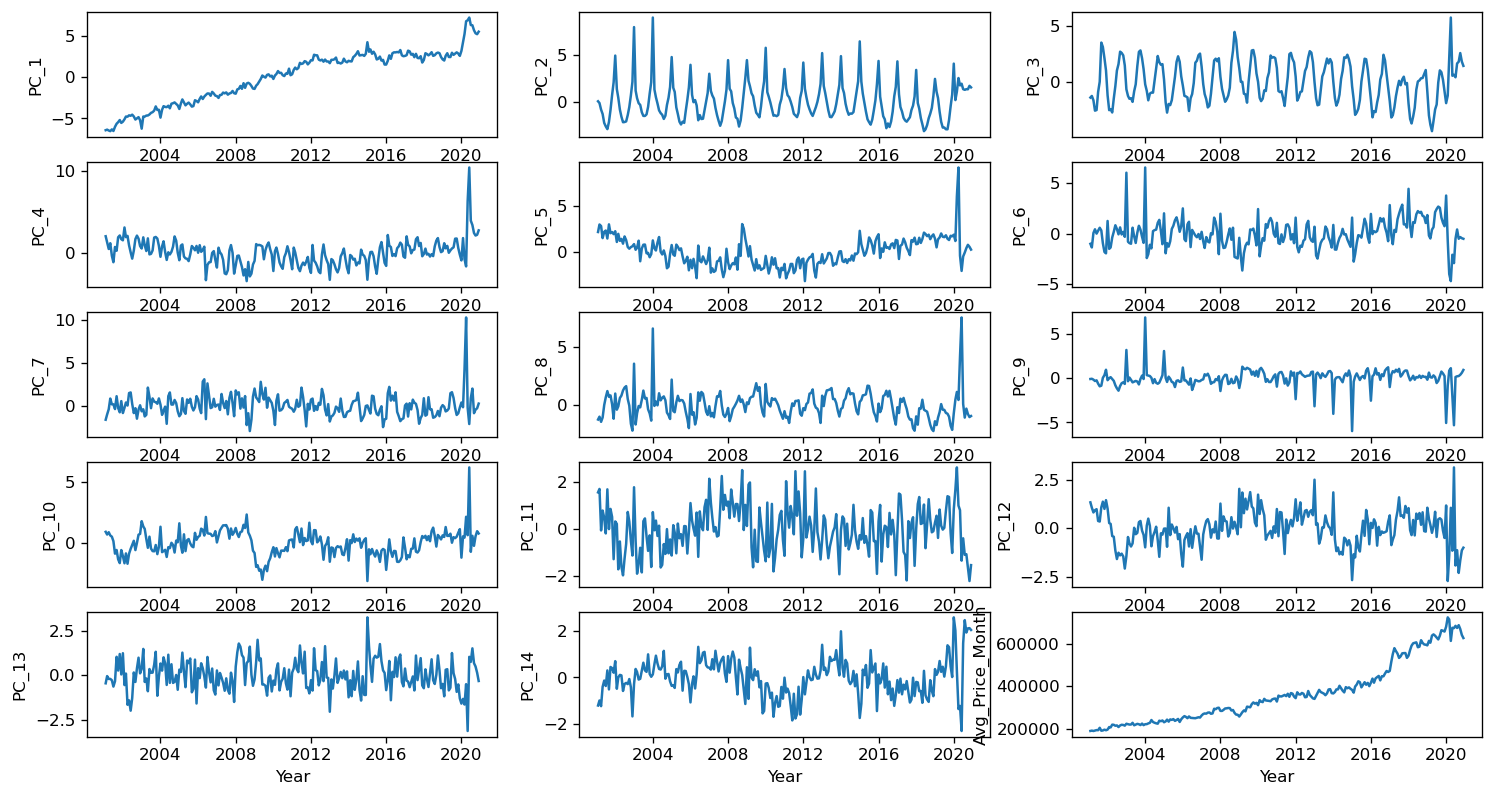

In [474]:
fig, axes = plt.subplots(nrows = 5, ncols = 3, dpi = 120, figsize = (15, 8))
axes[0, 0].plot(data_1.index, data_1["PC_1"])
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('PC_1')
axes[0, 1].plot(data_1.index, data_1["PC_2"])
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('PC_2')
axes[0, 2].plot(data_1.index, data_1["PC_3"])
axes[0, 2].set_xlabel('Year')
axes[0, 2].set_ylabel('PC_3')
axes[1, 0].plot(data_1.index, data_1["PC_4"])
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('PC_4')
axes[1, 1].plot(data_1.index, data_1["PC_5"])
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('PC_5')
axes[1, 2].plot(data_1.index, data_1["PC_6"])
axes[1, 2].set_xlabel('Year')
axes[1, 2].set_ylabel('PC_6')
axes[2, 0].plot(data_1.index, data_1["PC_7"])
axes[2, 0].set_xlabel('Year')
axes[2, 0].set_ylabel('PC_7')
axes[2, 1].plot(data_1.index, data_1["PC_8"])
axes[2, 1].set_xlabel('Year')
axes[2, 1].set_ylabel('PC_8')
axes[2, 2].plot(data_1.index, data_1["PC_9"])
axes[2, 2].set_xlabel('Year')
axes[2, 2].set_ylabel('PC_9')
axes[3, 0].plot(data_1.index, data_1["PC_10"])
axes[3, 0].set_xlabel('Year')
axes[3, 0].set_ylabel('PC_10')
axes[3, 1].plot(data_1.index, data_1["PC_11"])
axes[3, 1].set_xlabel('Year')
axes[3, 1].set_ylabel('PC_11')
axes[3, 2].plot(data_1.index, data_1["PC_12"])
axes[3, 2].set_xlabel('Year')
axes[3, 2].set_ylabel('PC_12')
axes[4, 0].plot(data_1.index, data_1["PC_13"])
axes[4, 0].set_xlabel('Year')
axes[4, 0].set_ylabel('PC_13')
axes[4, 1].plot(data_1.index, data_1["PC_14"])
axes[4, 1].set_xlabel('Year')
axes[4, 1].set_ylabel('PC_14')
axes[4, 2].plot(data_1.index, data_1["Avg_Price_Month"])
axes[4, 2].set_xlabel('Year')
axes[4, 2].set_ylabel('Avg_Price_Month')

# Data Processing - Normalize

In [475]:
avgs = data_1.mean()
devs = data_1.std()

In [476]:
for col in data_1.columns:
    data_1[col] = (data_1[col] - avgs.loc[col]) / devs.loc[col]

In [477]:
data_after_norm = data_1

Text(0, 0.5, 'Avg_Price_Month')

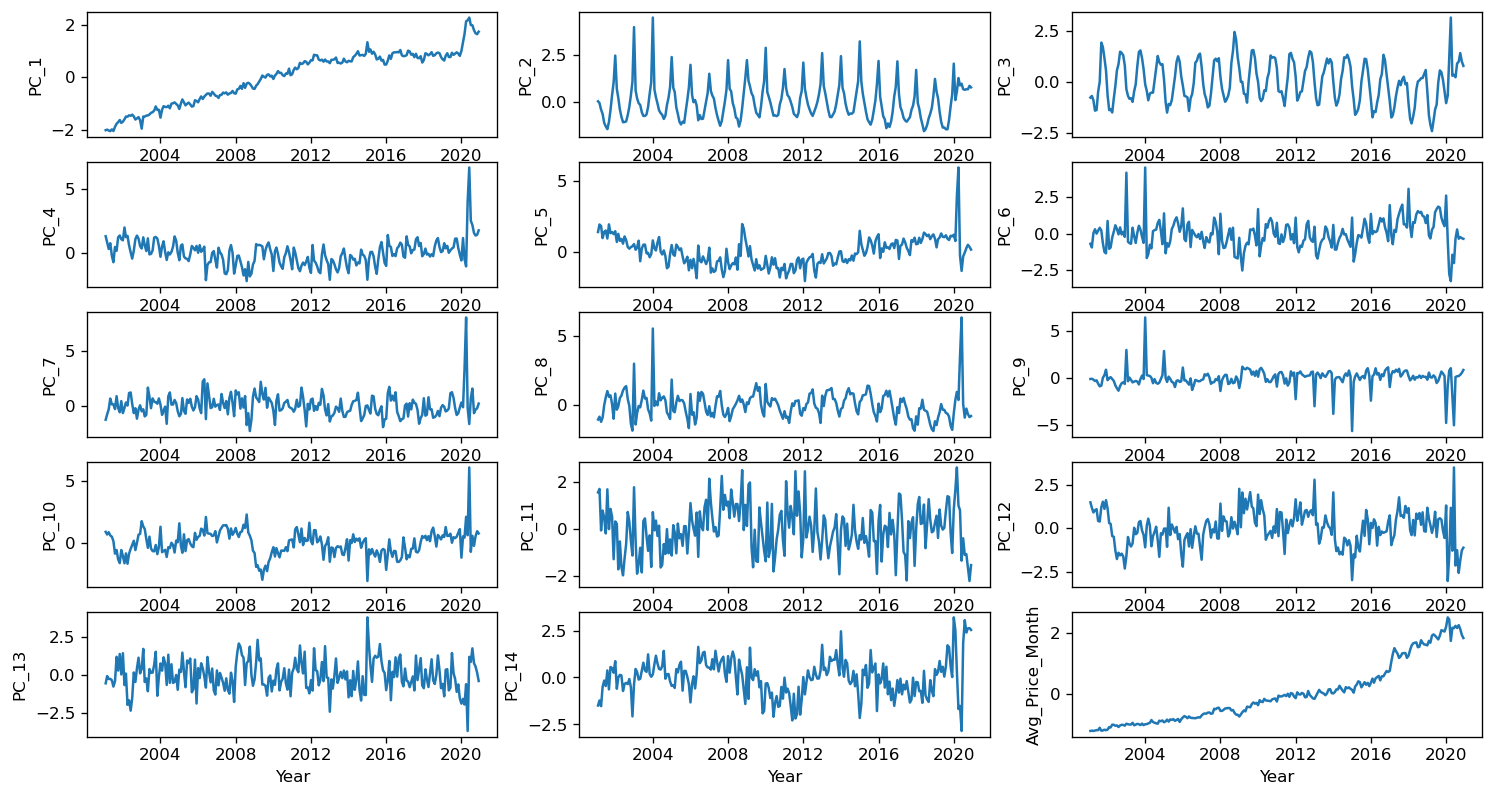

In [478]:
fig, axes = plt.subplots(nrows = 5, ncols = 3, dpi = 120, figsize = (15, 8))
axes[0, 0].plot(data_1.index, data_1["PC_1"])
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('PC_1')
axes[0, 1].plot(data_1.index, data_1["PC_2"])
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('PC_2')
axes[0, 2].plot(data_1.index, data_1["PC_3"])
axes[0, 2].set_xlabel('Year')
axes[0, 2].set_ylabel('PC_3')
axes[1, 0].plot(data_1.index, data_1["PC_4"])
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('PC_4')
axes[1, 1].plot(data_1.index, data_1["PC_5"])
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('PC_5')
axes[1, 2].plot(data_1.index, data_1["PC_6"])
axes[1, 2].set_xlabel('Year')
axes[1, 2].set_ylabel('PC_6')
axes[2, 0].plot(data_1.index, data_1["PC_7"])
axes[2, 0].set_xlabel('Year')
axes[2, 0].set_ylabel('PC_7')
axes[2, 1].plot(data_1.index, data_1["PC_8"])
axes[2, 1].set_xlabel('Year')
axes[2, 1].set_ylabel('PC_8')
axes[2, 2].plot(data_1.index, data_1["PC_9"])
axes[2, 2].set_xlabel('Year')
axes[2, 2].set_ylabel('PC_9')
axes[3, 0].plot(data_1.index, data_1["PC_10"])
axes[3, 0].set_xlabel('Year')
axes[3, 0].set_ylabel('PC_10')
axes[3, 1].plot(data_1.index, data_1["PC_11"])
axes[3, 1].set_xlabel('Year')
axes[3, 1].set_ylabel('PC_11')
axes[3, 2].plot(data_1.index, data_1["PC_12"])
axes[3, 2].set_xlabel('Year')
axes[3, 2].set_ylabel('PC_12')
axes[4, 0].plot(data_1.index, data_1["PC_13"])
axes[4, 0].set_xlabel('Year')
axes[4, 0].set_ylabel('PC_13')
axes[4, 1].plot(data_1.index, data_1["PC_14"])
axes[4, 1].set_xlabel('Year')
axes[4, 1].set_ylabel('PC_14')
axes[4, 2].plot(data_1.index, data_1["Avg_Price_Month"])
axes[4, 2].set_xlabel('Year')
axes[4, 2].set_ylabel('Avg_Price_Month')

# Take difference to remove trend

In [479]:
data_1 = data_1.diff().dropna()

In [480]:
data_1_diff = data_1

Text(0, 0.5, 'Avg_Price_Month')

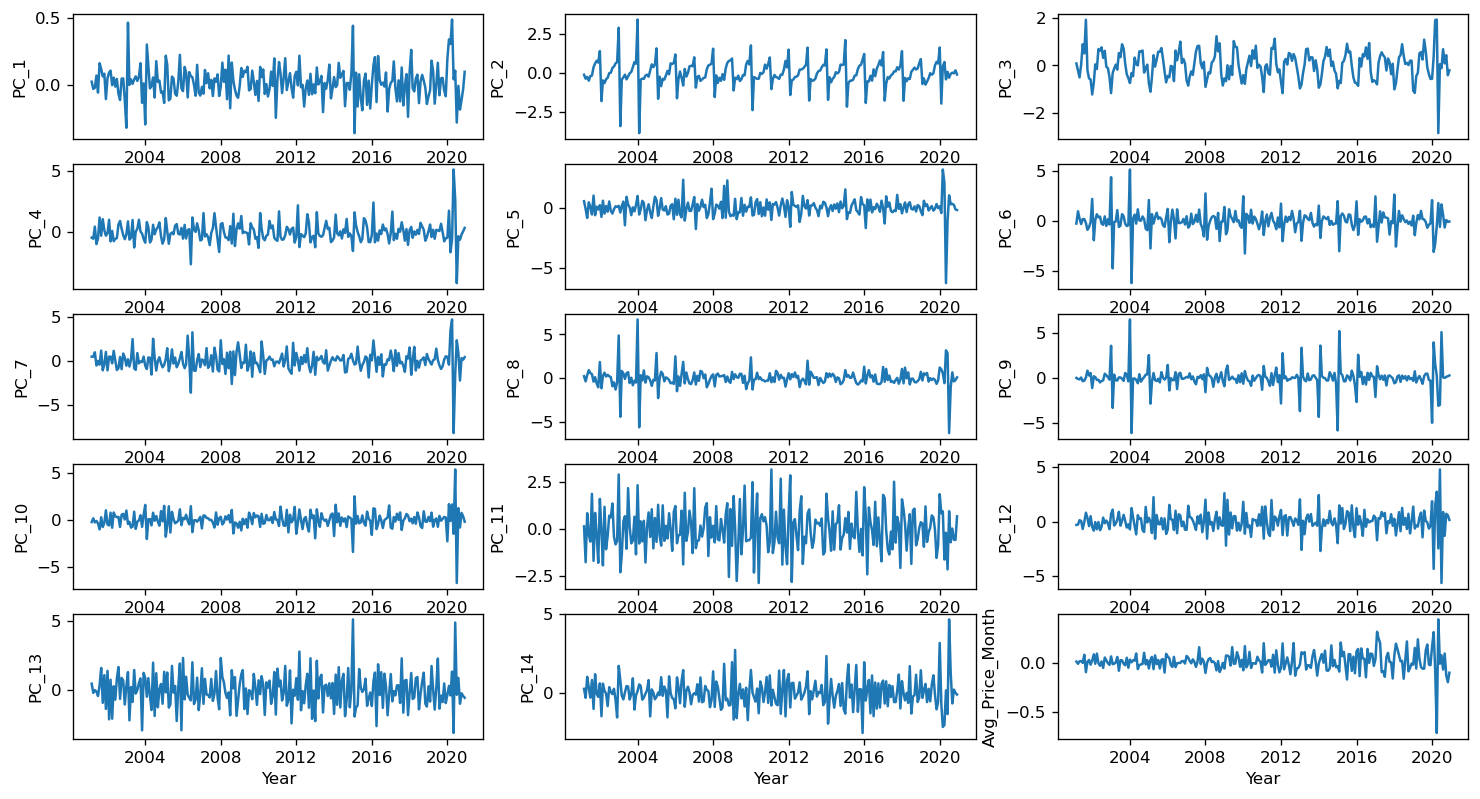

In [481]:
fig, axes = plt.subplots(nrows = 5, ncols = 3, dpi = 120, figsize = (15, 8))
axes[0, 0].plot(data_1.index, data_1["PC_1"])
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('PC_1')
axes[0, 1].plot(data_1.index, data_1["PC_2"])
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('PC_2')
axes[0, 2].plot(data_1.index, data_1["PC_3"])
axes[0, 2].set_xlabel('Year')
axes[0, 2].set_ylabel('PC_3')
axes[1, 0].plot(data_1.index, data_1["PC_4"])
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('PC_4')
axes[1, 1].plot(data_1.index, data_1["PC_5"])
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('PC_5')
axes[1, 2].plot(data_1.index, data_1["PC_6"])
axes[1, 2].set_xlabel('Year')
axes[1, 2].set_ylabel('PC_6')
axes[2, 0].plot(data_1.index, data_1["PC_7"])
axes[2, 0].set_xlabel('Year')
axes[2, 0].set_ylabel('PC_7')
axes[2, 1].plot(data_1.index, data_1["PC_8"])
axes[2, 1].set_xlabel('Year')
axes[2, 1].set_ylabel('PC_8')
axes[2, 2].plot(data_1.index, data_1["PC_9"])
axes[2, 2].set_xlabel('Year')
axes[2, 2].set_ylabel('PC_9')
axes[3, 0].plot(data_1.index, data_1["PC_10"])
axes[3, 0].set_xlabel('Year')
axes[3, 0].set_ylabel('PC_10')
axes[3, 1].plot(data_1.index, data_1["PC_11"])
axes[3, 1].set_xlabel('Year')
axes[3, 1].set_ylabel('PC_11')
axes[3, 2].plot(data_1.index, data_1["PC_12"])
axes[3, 2].set_xlabel('Year')
axes[3, 2].set_ylabel('PC_12')
axes[4, 0].plot(data_1.index, data_1["PC_13"])
axes[4, 0].set_xlabel('Year')
axes[4, 0].set_ylabel('PC_13')
axes[4, 1].plot(data_1.index, data_1["PC_14"])
axes[4, 1].set_xlabel('Year')
axes[4, 1].set_ylabel('PC_14')
axes[4, 2].plot(data_1.index, data_1["Avg_Price_Month"])
axes[4, 2].set_xlabel('Year')
axes[4, 2].set_ylabel('Avg_Price_Month')

# Remove volatility

In [482]:
annual_volatility = data_1.groupby(data_1.index.year).std()

In [483]:
annual_volatility

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,Avg_Price_Month
Date,,,,,,,,,,,,,,,
2001,0.084092,0.474046,0.790947,0.716549,0.573983,0.514263,0.766356,0.608408,0.369958,0.564779,1.250478,0.451545,0.877150,0.692008,0.044011
2002,0.074360,0.812603,0.621970,0.626759,0.412330,0.956384,0.781718,0.873686,0.417088,0.605044,1.087953,0.389827,1.276086,0.736308,0.044529
2003,0.181368,1.396833,0.578159,0.695991,0.600115,2.009799,0.943596,2.051059,1.500177,0.683071,1.518765,0.546198,1.361110,0.736242,0.044101
2004,0.149947,1.592364,0.446098,0.662892,0.652817,2.495290,1.055605,2.675936,2.704808,0.912207,1.103899,0.830070,1.183842,0.594075,0.047333
2005,0.127433,0.825276,0.615892,0.561320,0.526801,1.130035,0.814613,1.183854,1.201126,1.056790,0.863457,1.000944,1.542659,0.677783,0.061681
2006,0.089872,0.715573,0.489068,0.962131,0.911135,1.038805,1.823060,1.148904,0.773137,0.646125,1.115612,0.805540,1.211354,0.773731,0.035638
2007,0.066507,0.567166,0.553564,0.942650,0.862940,0.739488,0.958240,0.610002,0.338804,0.523943,1.068623,0.688390,0.953981,0.556994,0.050319
2008,0.125791,0.826806,0.688086,0.794667,1.036267,1.249355,1.552617,0.467184,0.725980,0.662287,1.115606,0.936895,1.246941,0.965965,0.051030
2009,0.071805,0.606921,0.618638,0.598291,0.559325,0.849428,1.023630,0.568477,0.632768,0.599236,1.440951,1.346419,1.015224,1.381826,0.065174


In [484]:
data_1["PC_1_annual_vol"] = data_1.index.map(lambda x: annual_volatility.loc[x.year, 'PC_1'])
data_1["PC_2_annual_vol"] = data_1.index.map(lambda x: annual_volatility.loc[x.year, 'PC_2'])
data_1["PC_3_annual_vol"] = data_1.index.map(lambda x: annual_volatility.loc[x.year, 'PC_3'])
data_1["PC_4_annual_vol"] = data_1.index.map(lambda x: annual_volatility.loc[x.year, 'PC_4'])
data_1["PC_5_annual_vol"] = data_1.index.map(lambda x: annual_volatility.loc[x.year, 'PC_5'])
data_1["PC_6_annual_vol"] = data_1.index.map(lambda x: annual_volatility.loc[x.year, 'PC_6'])
data_1["PC_7_annual_vol"] = data_1.index.map(lambda x: annual_volatility.loc[x.year, 'PC_7'])
data_1["PC_8_annual_vol"] = data_1.index.map(lambda x: annual_volatility.loc[x.year, 'PC_8'])
data_1["PC_9_annual_vol"] = data_1.index.map(lambda x: annual_volatility.loc[x.year, 'PC_9'])
data_1["PC_10_annual_vol"] = data_1.index.map(lambda x: annual_volatility.loc[x.year, 'PC_10'])
data_1["PC_11_annual_vol"] = data_1.index.map(lambda x: annual_volatility.loc[x.year, 'PC_11'])
data_1["PC_12_annual_vol"] = data_1.index.map(lambda x: annual_volatility.loc[x.year, 'PC_12'])
data_1["PC_13_annual_vol"] = data_1.index.map(lambda x: annual_volatility.loc[x.year, 'PC_13'])
data_1["PC_14_annual_vol"] = data_1.index.map(lambda x: annual_volatility.loc[x.year, 'PC_14'])
data_1["Avg_Price_Month_annual_vol"] = data_1.index.map(lambda x: annual_volatility.loc[x.year, 'Avg_Price_Month'])

In [485]:
data_1

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_6_annual_vol,PC_7_annual_vol,PC_8_annual_vol,PC_9_annual_vol,PC_10_annual_vol,PC_11_annual_vol,PC_12_annual_vol,PC_13_annual_vol,PC_14_annual_vol,Avg_Price_Month_annual_vol
Date,,,,,,,,,,,,,,,,,,,,,
2001-03-01,0.021041,-0.093945,0.077884,-0.457419,0.531886,-0.246104,0.479602,0.209562,0.023688,-0.214065,...,0.514263,0.766356,0.608408,0.369958,0.564779,1.250478,0.451545,0.877150,0.692008,0.044011
2001-04-01,-0.032882,-0.350361,-0.212445,-0.535077,-0.108531,0.984048,0.472767,-0.376869,-0.093334,0.184681,...,0.514263,0.766356,0.608408,0.369958,0.564779,1.250478,0.451545,0.877150,0.692008,0.044011
2001-05-01,-0.024636,-0.233532,-0.511673,0.448175,-0.854276,0.256122,0.975124,0.316781,-0.141929,-0.256297,...,0.514263,0.766356,0.608408,0.369958,0.564779,1.250478,0.451545,0.877150,0.692008,0.044011
2001-06-01,0.067070,-0.477514,0.029065,-0.977076,0.443359,-0.297286,-0.525690,0.905865,0.069740,-0.099743,...,0.514263,0.766356,0.608408,0.369958,0.564779,1.250478,0.451545,0.877150,0.692008,0.044011
2001-07-01,-0.060610,-0.182586,0.891003,-0.506480,0.090540,0.204501,0.000350,0.560162,-0.349968,-0.357326,...,0.514263,0.766356,0.608408,0.369958,0.564779,1.250478,0.451545,0.877150,0.692008,0.044011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,-0.010070,-0.038068,0.683043,-0.342284,0.276012,0.631861,0.888129,-0.990781,0.076406,1.274733,...,1.550732,3.246814,2.378203,2.814119,2.869380,1.160992,2.948315,1.850278,2.010670,0.286407
2020-09-01,-0.187689,0.035995,0.083608,-0.619638,0.316257,-0.636040,-2.239745,0.651239,0.027356,-0.796361,...,1.550732,3.246814,2.378203,2.814119,2.869380,1.160992,2.948315,1.850278,2.010670,0.286407
2020-10-01,-0.116792,-0.006260,0.428809,-0.199086,0.233165,0.115976,0.316579,-0.386493,0.130331,0.758824,...,1.550732,3.246814,2.378203,2.814119,2.869380,1.160992,2.948315,1.850278,2.010670,0.286407


In [486]:
data_1["PC_1"] = data_1["PC_1"] / data_1["PC_1_annual_vol"]
data_1["PC_2"] = data_1["PC_2"] / data_1["PC_2_annual_vol"]
data_1["PC_3"] = data_1["PC_3"] / data_1["PC_3_annual_vol"]
data_1["PC_4"] = data_1["PC_4"] / data_1["PC_4_annual_vol"]
data_1["PC_5"] = data_1["PC_5"] / data_1["PC_5_annual_vol"]
data_1["PC_6"] = data_1["PC_6"] / data_1["PC_6_annual_vol"]
data_1["PC_7"] = data_1["PC_7"] / data_1["PC_7_annual_vol"]
data_1["PC_8"] = data_1["PC_8"] / data_1["PC_8_annual_vol"]
data_1["PC_9"] = data_1["PC_9"] / data_1["PC_9_annual_vol"]
data_1["PC_10"] = data_1["PC_10"] / data_1["PC_10_annual_vol"]
data_1["PC_11"] = data_1["PC_11"] / data_1["PC_11_annual_vol"]
data_1["PC_12"] = data_1["PC_12"] / data_1["PC_12_annual_vol"]
data_1["PC_13"] = data_1["PC_13"] / data_1["PC_13_annual_vol"]
data_1["PC_14"] = data_1["PC_14"] / data_1["PC_14_annual_vol"]
data_1["Avg_Price_Month"] = data_1["Avg_Price_Month"] / data_1["Avg_Price_Month_annual_vol"]


In [487]:
data_1

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_6_annual_vol,PC_7_annual_vol,PC_8_annual_vol,PC_9_annual_vol,PC_10_annual_vol,PC_11_annual_vol,PC_12_annual_vol,PC_13_annual_vol,PC_14_annual_vol,Avg_Price_Month_annual_vol
Date,,,,,,,,,,,,,,,,,,,,,
2001-03-01,0.250213,-0.198177,0.098470,-0.638363,0.926659,-0.478558,0.625822,0.344444,0.064030,-0.379024,...,0.514263,0.766356,0.608408,0.369958,0.564779,1.250478,0.451545,0.877150,0.692008,0.044011
2001-04-01,-0.391031,-0.739085,-0.268595,-0.746741,-0.189085,1.913513,0.616902,-0.619435,-0.252282,0.326997,...,0.514263,0.766356,0.608408,0.369958,0.564779,1.250478,0.451545,0.877150,0.692008,0.044011
2001-05-01,-0.292966,-0.492636,-0.646911,0.625463,-1.488330,0.498037,1.272416,0.520673,-0.383634,-0.453801,...,0.514263,0.766356,0.608408,0.369958,0.564779,1.250478,0.451545,0.877150,0.692008,0.044011
2001-06-01,0.797577,-1.007314,0.036747,-1.363585,0.772425,-0.578081,-0.685960,1.488911,0.188507,-0.176605,...,0.514263,0.766356,0.608408,0.369958,0.564779,1.250478,0.451545,0.877150,0.692008,0.044011
2001-07-01,-0.720754,-0.385164,1.126501,-0.706832,0.157740,0.397658,0.000456,0.920702,-0.945965,-0.632682,...,0.514263,0.766356,0.608408,0.369958,0.564779,1.250478,0.451545,0.877150,0.692008,0.044011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,-0.044564,-0.046079,0.551175,-0.150713,0.122613,0.407460,0.273538,-0.416609,0.027151,0.444254,...,1.550732,3.246814,2.378203,2.814119,2.869380,1.160992,2.948315,1.850278,2.010670,0.286407
2020-09-01,-0.830595,0.043570,0.067467,-0.272836,0.140491,-0.410155,-0.689829,0.273836,0.009721,-0.277538,...,1.550732,3.246814,2.378203,2.814119,2.869380,1.160992,2.948315,1.850278,2.010670,0.286407
2020-10-01,-0.516849,-0.007578,0.346023,-0.087661,0.103579,0.074788,0.097504,-0.162515,0.046313,0.264456,...,1.550732,3.246814,2.378203,2.814119,2.869380,1.160992,2.948315,1.850278,2.010670,0.286407


In [488]:
data_1_after_vol = data_1

Text(0, 0.5, 'Avg_Price_Month')

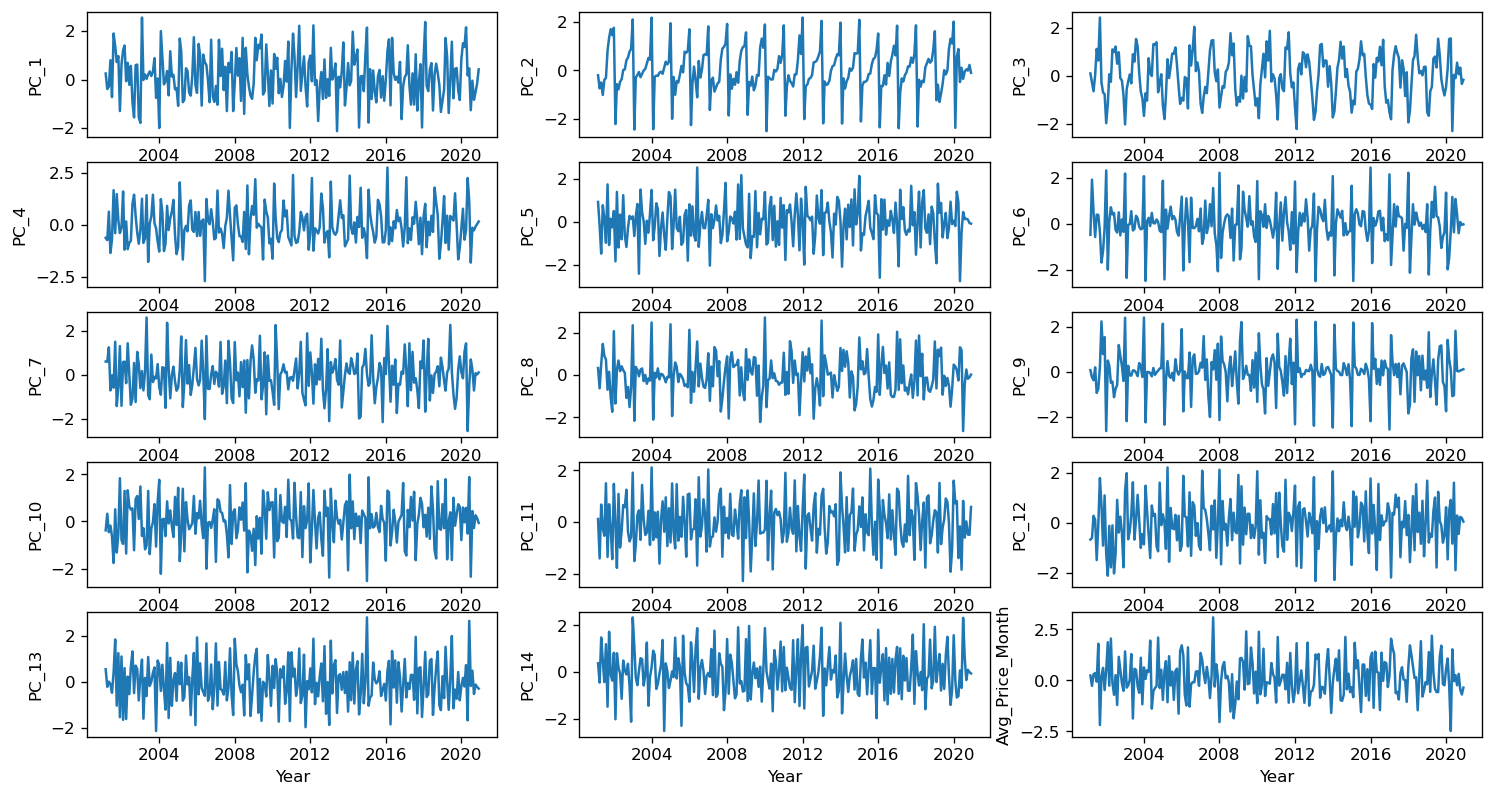

In [489]:
fig, axes = plt.subplots(nrows = 5, ncols = 3, dpi = 120, figsize = (15, 8))
axes[0, 0].plot(data_1.index, data_1["PC_1"])
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('PC_1')
axes[0, 1].plot(data_1.index, data_1["PC_2"])
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('PC_2')
axes[0, 2].plot(data_1.index, data_1["PC_3"])
axes[0, 2].set_xlabel('Year')
axes[0, 2].set_ylabel('PC_3')
axes[1, 0].plot(data_1.index, data_1["PC_4"])
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('PC_4')
axes[1, 1].plot(data_1.index, data_1["PC_5"])
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('PC_5')
axes[1, 2].plot(data_1.index, data_1["PC_6"])
axes[1, 2].set_xlabel('Year')
axes[1, 2].set_ylabel('PC_6')
axes[2, 0].plot(data_1.index, data_1["PC_7"])
axes[2, 0].set_xlabel('Year')
axes[2, 0].set_ylabel('PC_7')
axes[2, 1].plot(data_1.index, data_1["PC_8"])
axes[2, 1].set_xlabel('Year')
axes[2, 1].set_ylabel('PC_8')
axes[2, 2].plot(data_1.index, data_1["PC_9"])
axes[2, 2].set_xlabel('Year')
axes[2, 2].set_ylabel('PC_9')
axes[3, 0].plot(data_1.index, data_1["PC_10"])
axes[3, 0].set_xlabel('Year')
axes[3, 0].set_ylabel('PC_10')
axes[3, 1].plot(data_1.index, data_1["PC_11"])
axes[3, 1].set_xlabel('Year')
axes[3, 1].set_ylabel('PC_11')
axes[3, 2].plot(data_1.index, data_1["PC_12"])
axes[3, 2].set_xlabel('Year')
axes[3, 2].set_ylabel('PC_12')
axes[4, 0].plot(data_1.index, data_1["PC_13"])
axes[4, 0].set_xlabel('Year')
axes[4, 0].set_ylabel('PC_13')
axes[4, 1].plot(data_1.index, data_1["PC_14"])
axes[4, 1].set_xlabel('Year')
axes[4, 1].set_ylabel('PC_14')
axes[4, 2].plot(data_1.index, data_1["Avg_Price_Month"])
axes[4, 2].set_xlabel('Year')
axes[4, 2].set_ylabel('Avg_Price_Month')

# Remove Seasonality

In [490]:
month_avgs = data_1.groupby(data_1.index.month).mean()

In [491]:
month_avgs

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_6_annual_vol,PC_7_annual_vol,PC_8_annual_vol,PC_9_annual_vol,PC_10_annual_vol,PC_11_annual_vol,PC_12_annual_vol,PC_13_annual_vol,PC_14_annual_vol,Avg_Price_Month_annual_vol
Date,,,,,,,,,,,,,,,,,,,,,
1,-0.096306,1.874431,-1.374787,-0.506449,0.370478,1.747494,0.056453,1.741318,-0.987063,-0.439771,...,1.135026,1.098755,0.941590,1.156496,0.859436,1.191104,0.985235,1.286296,0.913556,0.089527
2,0.943875,-2.101072,-1.302184,1.705822,-1.347835,-2.036057,-0.113111,-0.965019,0.664692,-0.200630,...,1.135026,1.098755,0.941590,1.156496,0.859436,1.191104,0.985235,1.286296,0.913556,0.089527
3,0.860908,-0.407529,-0.240596,-0.432588,0.640069,-0.220247,0.165563,0.611548,0.304458,0.419200,...,1.103988,1.082135,0.924931,1.117169,0.844703,1.194073,0.958551,1.265839,0.902478,0.087251
4,0.135492,-0.469514,0.147525,-0.362666,0.056400,0.610453,0.460328,0.129660,-0.004989,-0.131321,...,1.103988,1.082135,0.924931,1.117169,0.844703,1.194073,0.958551,1.265839,0.902478,0.087251
5,0.187890,-0.435088,0.105697,-0.241769,-0.078920,0.213540,-0.008784,0.635111,-0.255958,-0.271327,...,1.103988,1.082135,0.924931,1.117169,0.844703,1.194073,0.958551,1.265839,0.902478,0.087251
6,0.297200,-0.472503,0.561272,-0.434116,0.117485,0.250858,0.018803,0.381805,-0.320523,0.518215,...,1.103988,1.082135,0.924931,1.117169,0.844703,1.194073,0.958551,1.265839,0.902478,0.087251
7,-0.205070,-0.125722,0.900897,-0.171476,0.043550,0.321849,0.107172,-0.115706,-0.211968,-0.153107,...,1.103988,1.082135,0.924931,1.117169,0.844703,1.194073,0.958551,1.265839,0.902478,0.087251
8,-0.003863,-0.074875,0.879518,0.688094,-0.264596,0.205127,-0.265394,-0.166935,-0.042853,-0.216959,...,1.103988,1.082135,0.924931,1.117169,0.844703,1.194073,0.958551,1.265839,0.902478,0.087251
9,0.085547,0.191272,1.114866,0.757083,-0.184573,0.156333,-0.338781,-0.431437,0.105226,-0.502079,...,1.103988,1.082135,0.924931,1.117169,0.844703,1.194073,0.958551,1.265839,0.902478,0.087251


In [492]:
data_1["PC_1_month_avg"] = data_1.index.map(lambda x: month_avgs.loc[x.month, 'PC_1'])
data_1["PC_2_month_avg"] = data_1.index.map(lambda x: month_avgs.loc[x.month, 'PC_2'])
data_1["PC_3_month_avg"] = data_1.index.map(lambda x: month_avgs.loc[x.month, 'PC_3'])
data_1["PC_4_month_avg"] = data_1.index.map(lambda x: month_avgs.loc[x.month, 'PC_4'])
data_1["PC_5_month_avg"] = data_1.index.map(lambda x: month_avgs.loc[x.month, 'PC_5'])
data_1["PC_6_month_avg"] = data_1.index.map(lambda x: month_avgs.loc[x.month, 'PC_6'])
data_1["PC_7_month_avg"] = data_1.index.map(lambda x: month_avgs.loc[x.month, 'PC_7'])
data_1["PC_8_month_avg"] = data_1.index.map(lambda x: month_avgs.loc[x.month, 'PC_8'])
data_1["PC_9_month_avg"] = data_1.index.map(lambda x: month_avgs.loc[x.month, 'PC_9'])
data_1["PC_10_month_avg"] = data_1.index.map(lambda x: month_avgs.loc[x.month, 'PC_10'])
data_1["PC_11_month_avg"] = data_1.index.map(lambda x: month_avgs.loc[x.month, 'PC_11'])
data_1["PC_12_month_avg"] = data_1.index.map(lambda x: month_avgs.loc[x.month, 'PC_12'])
data_1["PC_13_month_avg"] = data_1.index.map(lambda x: month_avgs.loc[x.month, 'PC_13'])
data_1["PC_14_month_avg"] = data_1.index.map(lambda x: month_avgs.loc[x.month, 'PC_14'])
data_1["Avg_Price_Month_month_avg"] = data_1.index.map(lambda x: month_avgs.loc[x.month, 'Avg_Price_Month'])

In [493]:
data_1

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_6_month_avg,PC_7_month_avg,PC_8_month_avg,PC_9_month_avg,PC_10_month_avg,PC_11_month_avg,PC_12_month_avg,PC_13_month_avg,PC_14_month_avg,Avg_Price_Month_month_avg
Date,,,,,,,,,,,,,,,,,,,,,
2001-03-01,0.250213,-0.198177,0.098470,-0.638363,0.926659,-0.478558,0.625822,0.344444,0.064030,-0.379024,...,-0.220247,0.165563,0.611548,0.304458,0.419200,-0.380640,0.210050,0.380401,0.381921,0.288516
2001-04-01,-0.391031,-0.739085,-0.268595,-0.746741,-0.189085,1.913513,0.616902,-0.619435,-0.252282,0.326997,...,0.610453,0.460328,0.129660,-0.004989,-0.131321,-0.463170,0.023744,-0.331997,-0.148095,0.312869
2001-05-01,-0.292966,-0.492636,-0.646911,0.625463,-1.488330,0.498037,1.272416,0.520673,-0.383634,-0.453801,...,0.213540,-0.008784,0.635111,-0.255958,-0.271327,0.141370,-0.434785,-0.240735,0.039999,0.614462
2001-06-01,0.797577,-1.007314,0.036747,-1.363585,0.772425,-0.578081,-0.685960,1.488911,0.188507,-0.176605,...,0.250858,0.018803,0.381805,-0.320523,0.518215,-0.439186,0.256714,0.237673,-0.013978,-0.257427
2001-07-01,-0.720754,-0.385164,1.126501,-0.706832,0.157740,0.397658,0.000456,0.920702,-0.945965,-0.632682,...,0.321849,0.107172,-0.115706,-0.211968,-0.153107,-0.011374,-0.282412,0.025998,-0.034087,-0.467681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,-0.044564,-0.046079,0.551175,-0.150713,0.122613,0.407460,0.273538,-0.416609,0.027151,0.444254,...,0.205127,-0.265394,-0.166935,-0.042853,-0.216959,0.596245,0.326293,0.116894,0.288399,-0.020514
2020-09-01,-0.830595,0.043570,0.067467,-0.272836,0.140491,-0.410155,-0.689829,0.273836,0.009721,-0.277538,...,0.156333,-0.338781,-0.431437,0.105226,-0.502079,0.287515,-0.068163,-0.193945,-0.254470,0.604315
2020-10-01,-0.516849,-0.007578,0.346023,-0.087661,0.103579,0.074788,0.097504,-0.162515,0.046313,0.264456,...,-0.584424,-0.371062,-0.562391,0.503769,0.291657,-0.056302,0.091944,0.302062,0.365508,0.231905


In [494]:
data_1["PC_1"] = data_1["PC_1"] / data_1["PC_1_month_avg"]
data_1["PC_2"] = data_1["PC_2"] / data_1["PC_2_month_avg"]
data_1["PC_3"] = data_1["PC_3"] / data_1["PC_3_month_avg"]
data_1["PC_4"] = data_1["PC_4"] / data_1["PC_4_month_avg"]
data_1["PC_5"] = data_1["PC_5"] / data_1["PC_5_month_avg"]
data_1["PC_6"] = data_1["PC_6"] / data_1["PC_6_month_avg"]
data_1["PC_7"] = data_1["PC_7"] / data_1["PC_7_month_avg"]
data_1["PC_8"] = data_1["PC_8"] / data_1["PC_8_month_avg"]
data_1["PC_9"] = data_1["PC_9"] / data_1["PC_9_month_avg"]
data_1["PC_10"] = data_1["PC_10"] / data_1["PC_10_month_avg"]
data_1["PC_11"] = data_1["PC_11"] / data_1["PC_11_month_avg"]
data_1["PC_12"] = data_1["PC_12"] / data_1["PC_12_month_avg"]
data_1["PC_13"] = data_1["PC_13"] / data_1["PC_13_month_avg"]
data_1["PC_14"] = data_1["PC_14"] / data_1["PC_14_month_avg"]
data_1["Avg_Price_Month"] = data_1["Avg_Price_Month"] / data_1["Avg_Price_Month_month_avg"]


In [495]:
data_1

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_6_month_avg,PC_7_month_avg,PC_8_month_avg,PC_9_month_avg,PC_10_month_avg,PC_11_month_avg,PC_12_month_avg,PC_13_month_avg,PC_14_month_avg,Avg_Price_Month_month_avg
Date,,,,,,,,,,,,,,,,,,,,,
2001-03-01,0.290639,0.486288,-0.409275,1.475683,1.447748,2.172821,3.779963,0.563233,0.210308,-0.904162,...,-0.220247,0.165563,0.611548,0.304458,0.419200,-0.380640,0.210050,0.380401,0.381921,0.288516
2001-04-01,-2.886010,1.574150,-1.820676,2.059033,-3.352589,3.134578,1.340135,-4.777377,50.567022,-2.490058,...,0.610453,0.460328,0.129660,-0.004989,-0.131321,-0.463170,0.023744,-0.331997,-0.148095,0.312869
2001-05-01,-1.559242,1.132267,-6.120417,-2.587032,18.858699,2.332286,-144.849948,0.819814,1.498817,1.672527,...,0.213540,-0.008784,0.635111,-0.255958,-0.271327,0.141370,-0.434785,-0.240735,0.039999,0.614462
2001-06-01,2.683639,2.131870,0.065472,3.141063,6.574643,-2.304421,-36.481574,3.899660,-0.588122,-0.340795,...,0.250858,0.018803,0.381805,-0.320523,0.518215,-0.439186,0.256714,0.237673,-0.013978,-0.257427
2001-07-01,3.514668,3.063611,1.250422,4.122053,3.622046,1.235543,0.004257,-7.957269,4.462778,4.132294,...,0.321849,0.107172,-0.115706,-0.211968,-0.153107,-0.011374,-0.282412,0.025998,-0.034087,-0.467681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,11.535013,0.615410,0.626678,-0.219029,-0.463396,1.986383,-1.030688,2.495638,-0.633579,-2.047638,...,0.205127,-0.265394,-0.166935,-0.042853,-0.216959,0.596245,0.326293,0.116894,0.288399,-0.020514
2020-09-01,-9.709176,0.227790,0.060516,-0.360378,-0.761168,-2.623587,2.036208,-0.634708,0.092381,0.552777,...,0.156333,-0.338781,-0.431437,0.105226,-0.502079,0.287515,-0.068163,-0.193945,-0.254470,0.604315
2020-10-01,-1.536435,-0.012670,4.337798,-0.536854,-24.828113,-0.127969,-0.262771,0.288971,0.091933,0.906737,...,-0.584424,-0.371062,-0.562391,0.503769,0.291657,-0.056302,0.091944,0.302062,0.365508,0.231905


In [496]:
data_1_after_season = data_1

Text(0, 0.5, 'Avg_Price_Month')

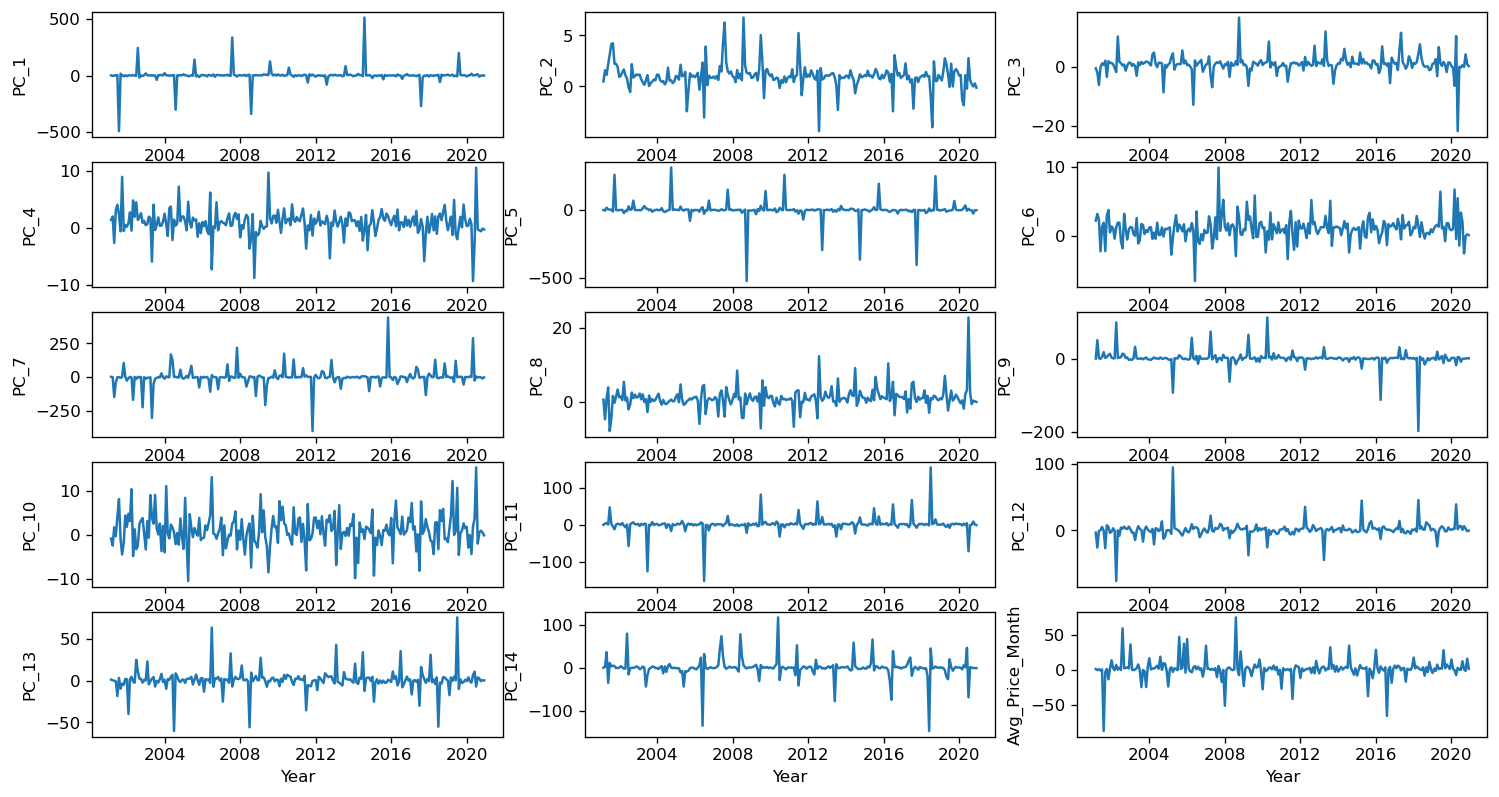

In [497]:
fig, axes = plt.subplots(nrows = 5, ncols = 3, dpi = 120, figsize = (15, 8))
axes[0, 0].plot(data_1.index, data_1["PC_1"])
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('PC_1')
axes[0, 1].plot(data_1.index, data_1["PC_2"])
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('PC_2')
axes[0, 2].plot(data_1.index, data_1["PC_3"])
axes[0, 2].set_xlabel('Year')
axes[0, 2].set_ylabel('PC_3')
axes[1, 0].plot(data_1.index, data_1["PC_4"])
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('PC_4')
axes[1, 1].plot(data_1.index, data_1["PC_5"])
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('PC_5')
axes[1, 2].plot(data_1.index, data_1["PC_6"])
axes[1, 2].set_xlabel('Year')
axes[1, 2].set_ylabel('PC_6')
axes[2, 0].plot(data_1.index, data_1["PC_7"])
axes[2, 0].set_xlabel('Year')
axes[2, 0].set_ylabel('PC_7')
axes[2, 1].plot(data_1.index, data_1["PC_8"])
axes[2, 1].set_xlabel('Year')
axes[2, 1].set_ylabel('PC_8')
axes[2, 2].plot(data_1.index, data_1["PC_9"])
axes[2, 2].set_xlabel('Year')
axes[2, 2].set_ylabel('PC_9')
axes[3, 0].plot(data_1.index, data_1["PC_10"])
axes[3, 0].set_xlabel('Year')
axes[3, 0].set_ylabel('PC_10')
axes[3, 1].plot(data_1.index, data_1["PC_11"])
axes[3, 1].set_xlabel('Year')
axes[3, 1].set_ylabel('PC_11')
axes[3, 2].plot(data_1.index, data_1["PC_12"])
axes[3, 2].set_xlabel('Year')
axes[3, 2].set_ylabel('PC_12')
axes[4, 0].plot(data_1.index, data_1["PC_13"])
axes[4, 0].set_xlabel('Year')
axes[4, 0].set_ylabel('PC_13')
axes[4, 1].plot(data_1.index, data_1["PC_14"])
axes[4, 1].set_xlabel('Year')
axes[4, 1].set_ylabel('PC_14')
axes[4, 2].plot(data_1.index, data_1["Avg_Price_Month"])
axes[4, 2].set_xlabel('Year')
axes[4, 2].set_ylabel('Avg_Price_Month')

In [509]:
data_final = data_1[['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7', 'PC_8', 'PC_9','PC_10', 'PC_11', 'PC_12', 'PC_13', 'PC_14', 'Avg_Price_Month']]

# Check for stationary

In [510]:
from statsmodels.tsa.stattools import adfuller

In [511]:
# Check for stationary for "Avg_Price_Month"
adfuller_test = adfuller(data_final["Avg_Price_Month"], autolag = "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))
# Yes it is stationary

ADF test statistic: -7.546867931444422
p-value: 3.266012831636417e-11


In [512]:
# Check for stationary for "PC_1" ~ "PC_14"
for i in range(1, 15):
    adfuller_test = adfuller(data_final[f'PC_{i}'], autolag = "AIC")
    print(f'For PC_{i}, ADF test statistic: {adfuller_test[0]}')
    print(f'p-value: {adfuller_test[1]}')
# Yes it is stationary

For PC_1, ADF test statistic: -15.575076469936644
p-value: 1.9645586488262884e-28
For PC_2, ADF test statistic: -13.229036940034115
p-value: 9.668721688182028e-25
For PC_3, ADF test statistic: -9.964944827196536
p-value: 2.3203296416202967e-17
For PC_4, ADF test statistic: -16.731315843151542
p-value: 1.3823564145743823e-29
For PC_5, ADF test statistic: -15.317544345435344
p-value: 4.106153886066276e-28
For PC_6, ADF test statistic: -17.87542664027408
p-value: 3.016429998575388e-30
For PC_7, ADF test statistic: -5.098619575333263
p-value: 1.4108873168980338e-05
For PC_8, ADF test statistic: -15.715667480398933
p-value: 1.3428161643175342e-28
For PC_9, ADF test statistic: -15.38531485248356
p-value: 3.365175654442568e-28
For PC_10, ADF test statistic: -16.596264373059828
p-value: 1.7807562231963608e-29
For PC_11, ADF test statistic: -15.376595770777953
p-value: 3.4517598452841534e-28
For PC_12, ADF test statistic: -14.933469776263264
p-value: 1.3554374776844742e-27
For PC_13, ADF test s

# Split into training and testing data

In [513]:
train = data_final.iloc[:-72, :]
test = data_final.iloc[-72:-62, :]

In [514]:
train

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,Avg_Price_Month
Date,,,,,,,,,,,,,,,
2001-03-01,0.290639,0.486288,-0.409275,1.475683,1.447748,2.172821,3.779963,0.563233,0.210308,-0.904162,-0.307442,-3.198606,1.426399,1.009634,0.827559
2001-04-01,-2.886010,1.574150,-1.820676,2.059033,-3.352589,3.134578,1.340135,-4.777377,50.567022,-2.490058,3.048751,-25.648528,0.650053,2.936112,-0.859731
2001-05-01,-1.559242,1.132267,-6.120417,-2.587032,18.858699,2.332286,-144.849948,0.819814,1.498817,1.672527,4.787868,-0.660236,-0.023111,37.163523,0.485391
2001-06-01,2.683639,2.131870,0.065472,3.141063,6.574643,-2.304421,-36.481574,3.899660,-0.588122,-0.340795,0.555853,0.493916,-0.435034,-34.468422,-1.399830
2001-07-01,3.514668,3.063611,1.250422,4.122053,3.622046,1.235543,0.004257,-7.957269,4.462778,4.132294,47.019711,5.300000,-18.207470,12.194653,0.132975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08-01,511.697244,0.145728,1.396740,-0.160587,-3.958802,-2.479829,7.384572,-1.105629,-8.789571,-1.002839,0.622251,2.549772,-12.058232,0.421315,34.203772
2014-09-01,1.495136,0.576307,-0.046205,2.346543,5.988582,0.164229,5.548057,0.153623,1.538374,1.824477,4.509656,1.231701,2.755334,-2.009367,3.525800
2014-10-01,0.446170,1.184739,3.568270,-3.869670,-363.331396,0.829447,-0.950715,2.956089,-0.310669,1.590190,19.781074,-3.162328,4.002121,-2.013163,-1.895214


In [515]:
test

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,Avg_Price_Month
Date,,,,,,,,,,,,,,,
2015-01-01,-22.246824,1.106663,1.123547,3.181832,5.784127,0.944404,1.036275,1.031471,2.454897,5.750957,0.666430,-2.371071,4.810669,-0.960671,-8.391210
2015-02-01,-1.877245,0.996106,0.796933,0.987422,0.996464,1.221347,4.218032,-0.293078,3.277329,-9.339840,-0.410511,-1.979351,-25.073264,-1.317029,-0.773968
2015-03-01,0.502527,1.534582,4.962170,-1.355216,-0.856299,-1.911189,-2.109277,1.089335,0.762922,-0.696149,-2.506297,-0.730590,-1.794404,3.666744,6.398445
2015-04-01,-5.922326,0.999286,1.227721,-0.047523,-10.875752,1.031923,3.949445,0.384846,-27.294806,-2.372156,2.378659,44.591630,1.799381,1.514821,1.908223
2015-05-01,1.990673,1.068711,2.765529,1.471430,-3.281266,2.074098,6.983775,0.166590,0.561004,0.953442,2.126694,1.332905,-3.459357,10.361038,1.606310
2015-06-01,-1.661020,0.854040,1.228134,1.990502,5.143674,-0.126008,-67.534619,3.260397,0.460339,-0.364918,0.918827,-0.738476,0.433889,66.891617,1.087203
2015-07-01,4.573634,1.194437,1.606045,3.377128,22.452027,-0.336880,-4.972830,0.406982,-0.596598,-2.388786,44.888561,-2.889559,-2.591587,-5.173826,3.316078
2015-08-01,-34.243684,1.712599,0.976276,1.736205,1.062358,2.672292,0.503375,6.741412,-1.178206,1.058640,3.473762,2.123378,0.287153,4.753506,-37.913318
2015-09-01,4.657311,1.385398,0.826015,1.298497,2.850306,3.328510,-1.662542,3.436308,-1.027444,0.899542,-0.382414,10.923180,-2.337889,3.604130,1.279785


# Select the best order for the VAR model

In [516]:
forecasting_model = VAR(train)

D:\Anaconda\software\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [518]:
AIC_result = []
for i in range(1, 7):
    results = forecasting_model.fit(i)
    AIC_result.append(results.aic)

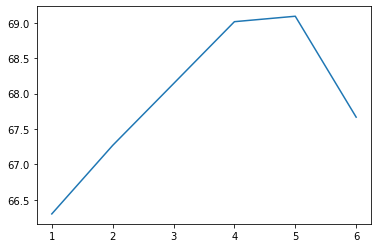

In [520]:
plt.plot(list(np.arange(1, 7, 1)), AIC_result)

In [521]:
# Select lag order as 4 to proceed

# Fit a VAR Model

In [522]:
results = forecasting_model.fit(4)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 31, May, 2021
Time:                     22:46:17
--------------------------------------------------------------------
No. of Equations:         15.0000    BIC:                    86.4541
Nobs:                     162.000    HQIC:                   76.0955
Log likelihood:          -8123.23    FPE:                1.68511e+30
AIC:                      69.0149    Det(Omega_mle):     1.39566e+28
--------------------------------------------------------------------
Results for equation PC_1
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                    -29.793511        18.510989           -1.610           0.108
L1.PC_1                    0.062691         0.098789            0.635           0.526
L1.PC_2                    8.842676      

# Forecasting

In [523]:
# Due to the lag order gets selected as 4
lagged_values = train.values[-4:]

In [526]:
forecast = pd.DataFrame(results.forecast(y = lagged_values, steps = 10), index = test.index, columns = ['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7', 'PC_8', 'PC_9','PC_10', 'PC_11', 'PC_12', 'PC_13', 'PC_14', 'Avg_Price_Month'])

In [527]:
forecast

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,Avg_Price_Month
Date,,,,,,,,,,,,,,,
2015-01-01,-64.819521,1.718295,0.091184,1.154265,9.721160,-0.435675,9.381114,-2.060335,13.963089,3.784219,-3.868127,-0.983610,-1.536758,3.195518,3.798291
2015-02-01,5.659373,1.491820,1.016355,1.405249,1.443604,0.821467,18.860714,0.701002,-9.278506,-4.771597,-1.688106,4.004124,23.536552,3.284849,14.374655
2015-03-01,59.142956,0.846847,0.692580,1.811753,-5.149617,1.921157,-14.382785,1.618219,2.272204,1.638084,-7.897959,-0.274780,-5.189027,-4.602866,5.811987
2015-04-01,-28.031424,1.097449,1.434034,-0.038853,-14.234353,0.774056,-21.065011,1.026862,2.320755,1.058013,-6.928310,-1.970507,7.312948,-4.416493,1.796708
2015-05-01,20.551944,1.147156,1.312730,0.175962,12.981299,1.370095,-26.737223,0.709454,3.918820,1.013524,7.064414,0.023387,-3.946722,3.161480,1.026106
2015-06-01,-22.532291,1.285755,0.360618,1.628450,27.498827,0.508321,-8.923080,-0.109137,2.321186,0.070651,1.431234,0.643831,-2.089793,-8.720516,4.913223
2015-07-01,-4.666802,0.860151,0.636274,1.274892,3.260844,0.743605,-3.508141,0.712406,2.998321,1.363986,0.154518,1.054189,1.081361,2.147405,-0.226200
2015-08-01,-5.571897,0.779463,0.805999,0.946632,-17.694999,1.214535,-10.018528,1.310548,2.829120,1.094178,-4.921221,-0.162204,2.652818,-0.436315,-0.993939
2015-09-01,11.342309,1.051687,0.814457,0.811802,1.507420,0.730027,-18.693930,0.690932,6.002846,1.597165,-0.625643,-2.046489,0.043788,1.081536,2.376122


In [528]:
test

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,Avg_Price_Month
Date,,,,,,,,,,,,,,,
2015-01-01,-22.246824,1.106663,1.123547,3.181832,5.784127,0.944404,1.036275,1.031471,2.454897,5.750957,0.666430,-2.371071,4.810669,-0.960671,-8.391210
2015-02-01,-1.877245,0.996106,0.796933,0.987422,0.996464,1.221347,4.218032,-0.293078,3.277329,-9.339840,-0.410511,-1.979351,-25.073264,-1.317029,-0.773968
2015-03-01,0.502527,1.534582,4.962170,-1.355216,-0.856299,-1.911189,-2.109277,1.089335,0.762922,-0.696149,-2.506297,-0.730590,-1.794404,3.666744,6.398445
2015-04-01,-5.922326,0.999286,1.227721,-0.047523,-10.875752,1.031923,3.949445,0.384846,-27.294806,-2.372156,2.378659,44.591630,1.799381,1.514821,1.908223
2015-05-01,1.990673,1.068711,2.765529,1.471430,-3.281266,2.074098,6.983775,0.166590,0.561004,0.953442,2.126694,1.332905,-3.459357,10.361038,1.606310
2015-06-01,-1.661020,0.854040,1.228134,1.990502,5.143674,-0.126008,-67.534619,3.260397,0.460339,-0.364918,0.918827,-0.738476,0.433889,66.891617,1.087203
2015-07-01,4.573634,1.194437,1.606045,3.377128,22.452027,-0.336880,-4.972830,0.406982,-0.596598,-2.388786,44.888561,-2.889559,-2.591587,-5.173826,3.316078
2015-08-01,-34.243684,1.712599,0.976276,1.736205,1.062358,2.672292,0.503375,6.741412,-1.178206,1.058640,3.473762,2.123378,0.287153,4.753506,-37.913318
2015-09-01,4.657311,1.385398,0.826015,1.298497,2.850306,3.328510,-1.662542,3.436308,-1.027444,0.899542,-0.382414,10.923180,-2.337889,3.604130,1.279785


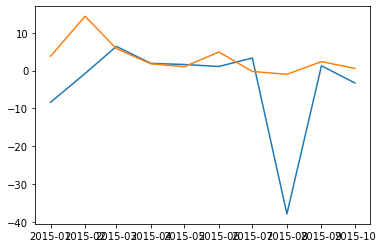

In [529]:
plt.plot(test.index, test["Avg_Price_Month"], label = "Actual Sale Price")
plt.plot(test.index, forecast["Avg_Price_Month"], label = "Forecast Sale Price")
plt.show()

# With keep feeding training data one month at a time - forecast (only the first output)

In [530]:
# Starting from 2014-12-01, the data before is used as training data
data_final.iloc[: -72, :]

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,Avg_Price_Month
Date,,,,,,,,,,,,,,,
2001-03-01,0.290639,0.486288,-0.409275,1.475683,1.447748,2.172821,3.779963,0.563233,0.210308,-0.904162,-0.307442,-3.198606,1.426399,1.009634,0.827559
2001-04-01,-2.886010,1.574150,-1.820676,2.059033,-3.352589,3.134578,1.340135,-4.777377,50.567022,-2.490058,3.048751,-25.648528,0.650053,2.936112,-0.859731
2001-05-01,-1.559242,1.132267,-6.120417,-2.587032,18.858699,2.332286,-144.849948,0.819814,1.498817,1.672527,4.787868,-0.660236,-0.023111,37.163523,0.485391
2001-06-01,2.683639,2.131870,0.065472,3.141063,6.574643,-2.304421,-36.481574,3.899660,-0.588122,-0.340795,0.555853,0.493916,-0.435034,-34.468422,-1.399830
2001-07-01,3.514668,3.063611,1.250422,4.122053,3.622046,1.235543,0.004257,-7.957269,4.462778,4.132294,47.019711,5.300000,-18.207470,12.194653,0.132975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08-01,511.697244,0.145728,1.396740,-0.160587,-3.958802,-2.479829,7.384572,-1.105629,-8.789571,-1.002839,0.622251,2.549772,-12.058232,0.421315,34.203772
2014-09-01,1.495136,0.576307,-0.046205,2.346543,5.988582,0.164229,5.548057,0.153623,1.538374,1.824477,4.509656,1.231701,2.755334,-2.009367,3.525800
2014-10-01,0.446170,1.184739,3.568270,-3.869670,-363.331396,0.829447,-0.950715,2.956089,-0.310669,1.590190,19.781074,-3.162328,4.002121,-2.013163,-1.895214


In [531]:
# For every loop, the training data will be fed with 1 more month (2001-03-01 ~ 2015-01-01, then 2001-03-01 ~ 2015-02-01, then...)
# The prediction will use the training data to predict the next 10 days (result is the same by changing the "steps" value) but only use the 1st day as result and append in "forecase_moving" list
# Also append the actual 
forecast_moving = []
actual_result = []
for i in range(-72, 0):
    train = data_final.iloc[:i, :]
    actual_result.append(data_final.iloc[i+1, 0])
    forecasting_model = VAR(train)
    results = forecasting_model.fit(7)
    lagged_values = train.values[-7:]
    forecast = results.forecast(y = lagged_values, steps = 10)[0][0]
    forecast_moving.append(forecast)

D:\Anaconda\software\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\software\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\software\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\software\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\software\envs\PythonData\lib\site-packages\statsmodels\t

D:\Anaconda\software\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\software\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\software\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\software\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\software\envs\PythonData\lib\site-packages\statsmodels\t

In [532]:
test_new = data_final.iloc[-72:, :]

In [533]:
len(test_new)

72

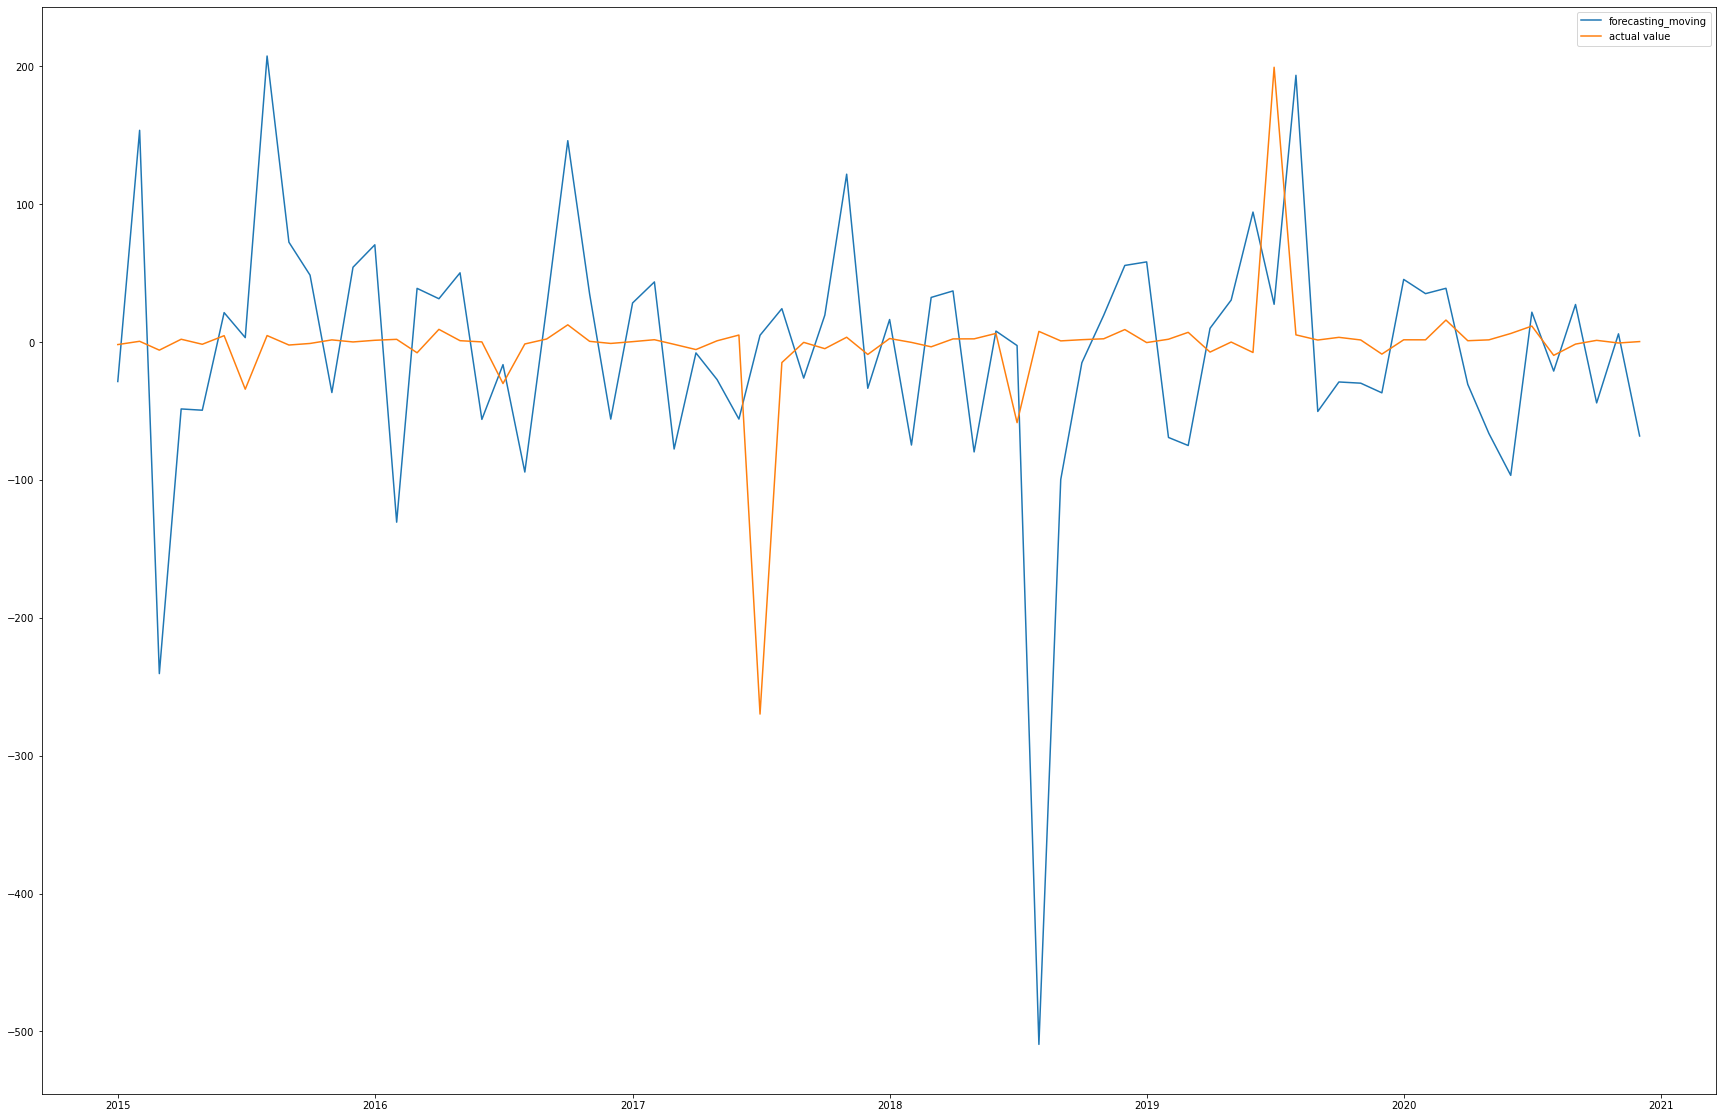

In [534]:
plt.figure(figsize = (30, 20))
plt.plot(test_new.index, forecast_moving, label = "forecasting_moving")
plt.plot(test_new.index, actual_result, label = "actual value")
plt.legend()
plt.show()

# Create functions for inverting back

In [133]:
my_sample = test
actual_value = df_raw.iloc[-72:-62, :]

In [136]:
actual_value

,Avg_Price_Month,Employment_rate_toronto,Ontario_population,New Units Number (construction complete)
Date,,,,
2015-01-01,382458.4944,60.9,1.365774e+07,11080.0
2015-02-01,369655.2567,61.3,1.365889e+07,4525.0
2015-03-01,398336.5445,61.6,1.366276e+07,3699.0
2015-04-01,407612.2145,61.5,1.366986e+07,2035.0
2015-05-01,422947.0346,62.2,1.367949e+07,3428.0
2015-06-01,418598.7408,62.5,1.369227e+07,3843.0
2015-07-01,394503.6272,63.1,1.370712e+07,2459.0
2015-08-01,406587.0217,63.1,1.372500e+07,1487.0
2015-09-01,418602.8636,62.6,1.374424e+07,3348.0


# PCA feature reduction

In [ ]:
from sklearn.decomposition import PCA